<a href="https://colab.research.google.com/github/thedarsideofit/finance_python_practices/blob/main/prophet_ticker_forecasting_log.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Main Source

https://towardsdatascience.com/apple-stock-and-bitcoin-price-predictions-using-fbs-prophet-for-beginners-python-96d5ec404b77?gi=962fdc51375b

### Changepoint Detection
https://facebook.github.io/prophet/docs/trend_changepoints.html#automatic-changepoint-detection-in-prophet

### Plotly In Colab
https://colab.research.google.com/github/binnisb/blog/blob/master/_notebooks/2020-04-02-Plotly-in-lab.ipynb#scrollTo=fblKrSaCeCz3

### Hyper Parameter tunning and metrics
https://futurice.com/blog/business-forecasting-with-facebook-prophet


In [1]:
pip install alphavantage_api

     |████████████████████████████████| 194kB 6.4MB/s 
  Created wheel for alphavantage-api: filename=alphaVantage_api-1.0.19-cp36-none-any.whl size=31078 sha256=2754305a2bb83de774a0cc0d0fa0cdaa6d06be3d8586a46a06e72d060cd1dc44
  Stored in directory: /root/.cache/pip/wheels/29/c9/58/65a232b76acc71aa17f73d849fe9ec8a854b3e44b5c57e2322
Successfully built alphavantage-api


In [3]:
pip install alpha_vantage

     |████████████████████████████████| 1.3MB 7.2MB/s 
     |████████████████████████████████| 296kB 17.4MB/s 
     |████████████████████████████████| 143kB 20.3MB/s 
  Created wheel for alpha-vantage: filename=alpha_vantage-2.2.0-cp36-none-any.whl size=25706 sha256=a26ec8e67259b6d152ce9a12274c5fed8d9da2ce8e2c20910b9bd0678444593f
  Stored in directory: /root/.cache/pip/wheels/3a/fa/05/80b0afcbd2a4de8bd2a0c5cd77084e3d3a9cc12c48be9b7f84
  Created wheel for idna-ssl: filename=idna_ssl-1.1.0-cp36-none-any.whl size=3161 sha256=b2673e086f9404587935aed2bbbf58b0709f8f03b8d777eae3c2e2b1d44a2449
  Stored in directory: /root/.cache/pip/wheels/d3/00/b3/32d613e19e08a739751dd6bf998cfed277728f8b2127ad4eb7
Successfully built alpha-vantage idna-ssl


In [5]:
import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import wordcloud
from alphaVantageAPI.alphavantage import AlphaVantage 

In [6]:
from alpha_vantage.timeseries import TimeSeries
import matplotlib.pyplot as plt
######### CHANGE THE TICKER HERE #########
ticker = 'KO'
######### CHANGE THE TICKER HERE #########
ts = TimeSeries(key='Your Access Key',output_format='pandas')
stock, meta_data = ts.get_daily(symbol=ticker,outputsize='full')
stock.head()

1. open  2. high  3. low  4. close   5. volume
date                                                      
2020-11-27    53.11    53.19   52.61     52.70   8499289.0
2020-11-25    53.07    53.28   52.79     52.93  10194758.0
2020-11-24    53.14    53.59   53.02     53.22  12998958.0
2020-11-23    52.95    53.17   52.20     52.68  13194015.0
2020-11-20    53.19    53.25   52.59     52.67  15647921.0

In [7]:
#Write/Read from a file.
stock.to_csv ('/content/drive/My Drive/Colab Notebooks/Finanzas/' + ticker + 'pricedata.csv', index = 'date', header=True)
stock = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Finanzas/' + ticker + 'pricedata.csv')
stock.head()

date  1. open  2. high  3. low  4. close   5. volume
0  2020-11-27    53.11    53.19   52.61     52.70   8499289.0
1  2020-11-25    53.07    53.28   52.79     52.93  10194758.0
2  2020-11-24    53.14    53.59   53.02     53.22  12998958.0
3  2020-11-23    52.95    53.17   52.20     52.68  13194015.0
4  2020-11-20    53.19    53.25   52.59     52.67  15647921.0

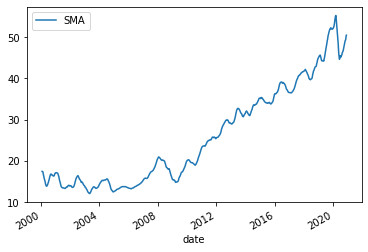

In [8]:
from alpha_vantage.techindicators import TechIndicators
import matplotlib.pyplot as plt
ti = TechIndicators(key='NLRHFAQBGU5WGPQH',output_format='pandas')
data, meta_data = ti.get_sma(symbol=ticker,interval='daily', time_period=60,series_type = 'close')
data.plot()
plt.show()

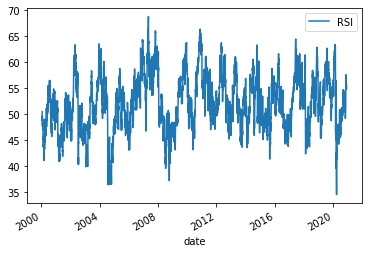

In [9]:
from alpha_vantage.techindicators import TechIndicators
import matplotlib.pyplot as plt
ti = TechIndicators(key='Youraccesskey',output_format='pandas')
data, meta_data = ti.get_rsi(symbol=ticker,interval='daily', time_period=60,series_type = 'close')
data.plot()
plt.show()

In [10]:
#Convert the dataframe into the prophet expected format.
stock.rename(columns={'4. close': 'y', 'date': 'ds'},inplace=True)
stock['ds'] = pd.to_datetime(stock['ds'])
# To avoid the peaks we're gonna use the log
stock['y']= np.log(stock['y']).astype(float)
stock.head()

ds  1. open  2. high  3. low         y   5. volume
0 2020-11-27    53.11    53.19   52.61  3.964615   8499289.0
1 2020-11-25    53.07    53.28   52.79  3.968970  10194758.0
2 2020-11-24    53.14    53.59   53.02  3.974434  12998958.0
3 2020-11-23    52.95    53.17   52.20  3.964236  13194015.0
4 2020-11-20    53.19    53.25   52.59  3.964046  15647921.0

In [16]:
#Fit the model 
df_prophet = Prophet(changepoint_prior_scale=0.01, daily_seasonality=True)
df_prophet.fit(stock)

In [17]:
fcast_time= 365   # 1 year
df_forecast = df_prophet.make_future_dataframe(periods= fcast_time, freq='D')
df_forecast.tail(10)

ds
5659 2021-11-18
5660 2021-11-19
5661 2021-11-20
5662 2021-11-21
5663 2021-11-22
5664 2021-11-23
5665 2021-11-24
5666 2021-11-25
5667 2021-11-26
5668 2021-11-27

In [18]:
# Forecasting - call the method predict
df_forecast = df_prophet.predict(df_forecast)
df_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper'] ]
df = df_forecast[df_forecast['ds']< '2020-11-30']
# Convert the value to see the price
df['yhat'] = np.exp(df['yhat'])
df['yhat_lower'] = np.exp(df['yhat_lower'])
df['yhat_upper'] = np.exp(df['yhat_upper'])
df[['ds','yhat', 'yhat_lower', 'yhat_upper'] ].to_csv ('/content/drive/My Drive/Colab Notebooks/Finanzas/' + ticker + 'pricedata-predicted.csv', index = 'ds', header=True)
df[['ds','yhat', 'yhat_lower', 'yhat_upper'] ].tail(20)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

ds       yhat  yhat_lower  yhat_upper
5286 2020-11-03  50.991150   45.766172   56.629763
5287 2020-11-04  51.015526   45.419886   56.934158
5288 2020-11-05  51.031648   46.055004   57.253186
5289 2020-11-06  51.082821   45.728113   56.221854
5290 2020-11-09  51.195445   46.039210   56.715486
5291 2020-11-10  51.304915   45.960215   56.874251
5292 2020-11-11  51.338117   46.108490   57.157335
5293 2020-11-12  51.361956   46.274252   57.173154
5294 2020-11-13  51.419650   46.301024   56.944271
5295 2020-11-16  51.539644   46.210999   56.924612
5296 2020-11-17  51.647133   46.282102   57.396994
5297 2020-11-18  51.675035   46.471475   57.249322
5298 2020-11-19  51.690594   46.260062   57.527332
5299 2020-11-20  51.737254   46.689569   57.851157
5300 2020-11-23  51.806621   46.912052   57.745484
5301 2020-11-24  51.892395   46.709893   57.849586
5302 2020-11-25  51.896048   46.736284   58.155090
5303 2020-11-27  51.904933   46.736944   57.634290
5304 2020-11-28  52.110389   46.790695   58.045895
5305 2020-11-29  52.113834   46.662767   57.938310

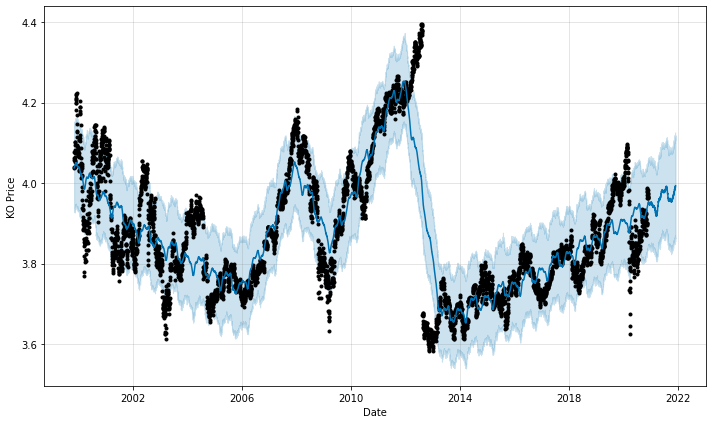

In [19]:
fig = df_prophet.plot(df_forecast, xlabel = 'Date', ylabel = ticker + ' Price')
fig.show()

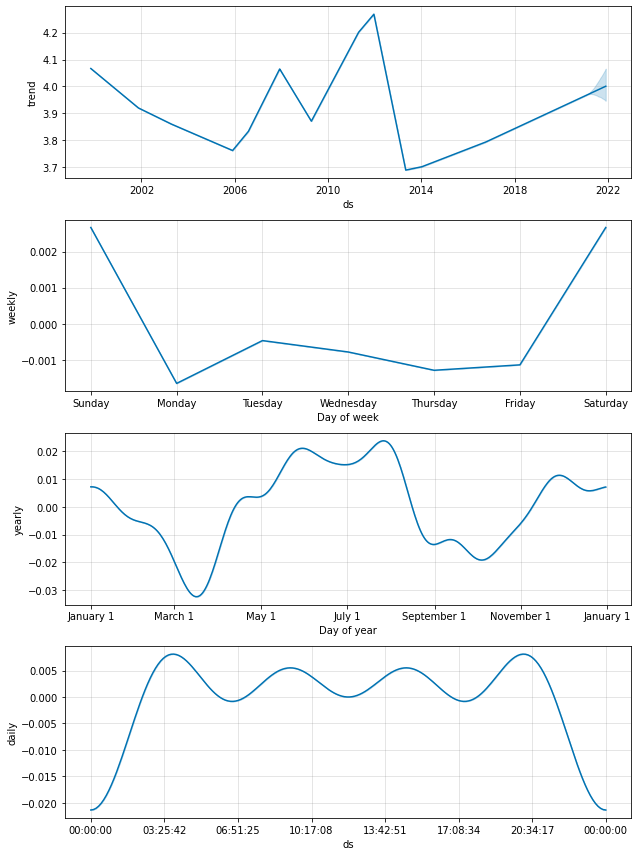

In [20]:
fig2 = df_prophet.plot_components(df_forecast)
plt.show()

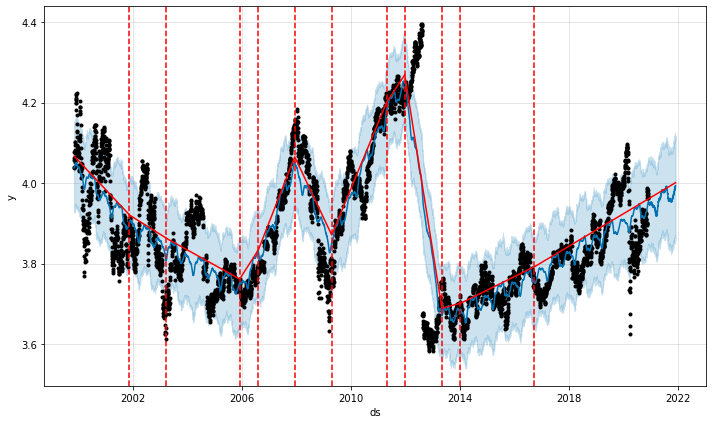

In [21]:
from fbprophet.plot import add_changepoints_to_plot

fig = df_prophet.plot(df_forecast)
a = add_changepoints_to_plot(fig.gca(), df_prophet, df_forecast)


In [23]:
from fbprophet.plot import plot_plotly
from IPython.display import HTML
fig = plot_plotly(df_prophet, df_forecast)  # This returns a plotly Figure
HTML(fig.to_html())

In [24]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(df_prophet, initial='730 days', period='180 days', horizon = '30 days')
df_cv.tail()

INFO:fbprophet:Making 39 forecasts with cutoffs between 2002-02-05 00:00:00 and 2020-10-28 00:00:00


ds      yhat  yhat_lower  yhat_upper         y     cutoff
793 2020-11-20  3.944009    3.833148    4.054891  3.964046 2020-10-28
794 2020-11-23  3.945383    3.826078    4.051485  3.964236 2020-10-28
795 2020-11-24  3.947084    3.839467    4.055339  3.974434 2020-10-28
796 2020-11-25  3.947256    3.830376    4.057601  3.968970 2020-10-28
797 2020-11-27  3.947765    3.844070    4.055392  3.964615 2020-10-28

In [25]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

horizon       mse      rmse       mae      mape     mdape  coverage
0  3 days  0.019372  0.139182  0.091807  0.024159  0.015226  0.673807
1  4 days  0.021671  0.147210  0.100569  0.026447  0.017241  0.599318
2  5 days  0.023309  0.152674  0.108484  0.028494  0.018629  0.574593
3  6 days  0.020275  0.142392  0.102638  0.026886  0.018087  0.569620
4  7 days  0.015286  0.123638  0.089833  0.023501  0.016451  0.612950

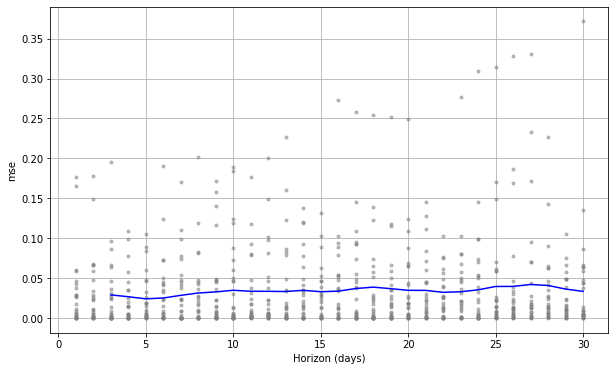

In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric = 'mse')